# Unsupervised Learning: Trade&Ahead - Jason Giust

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [4]:
# copying data set to avoid making unintended changes to the original data
df = data.copy()

<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

* some object data types that will be converted to categorical.

In [6]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplicates.

In [7]:
# checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* No missing values.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [8]:
# check the statistical summary of the data.
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

## Univariate Analysis


In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### 1. What does the distribution of stock prices look like?


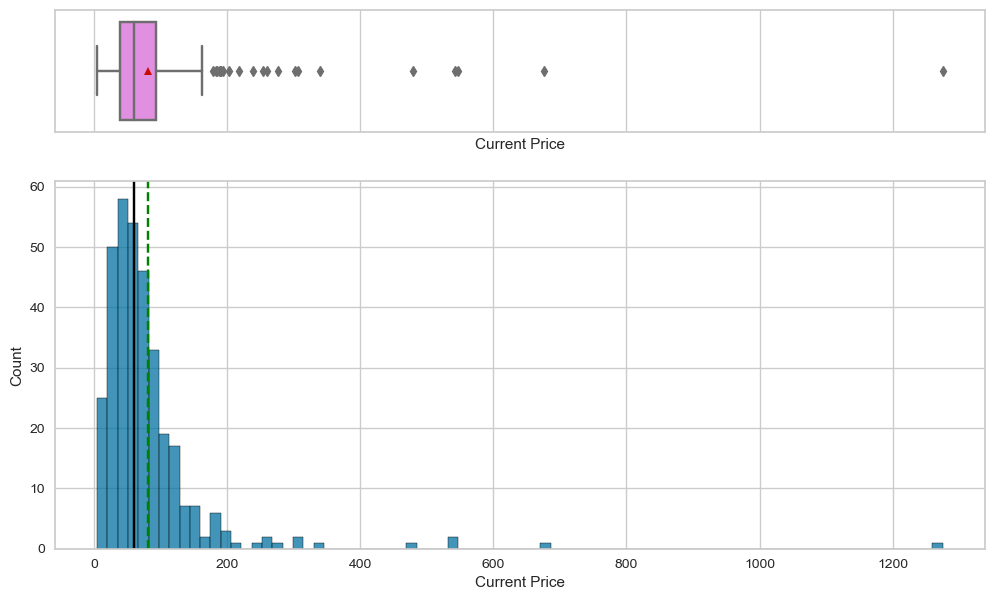

<IPython.core.display.Javascript object>

In [10]:
histogram_boxplot(df, "Current Price")

* Most stock prices are under $200.
* Right skewed due to some very large values.

#### 2. The stocks of which economic sector have seen the maximum price increase on average?


* The Health Care sector has seen the largest increase in price on average.

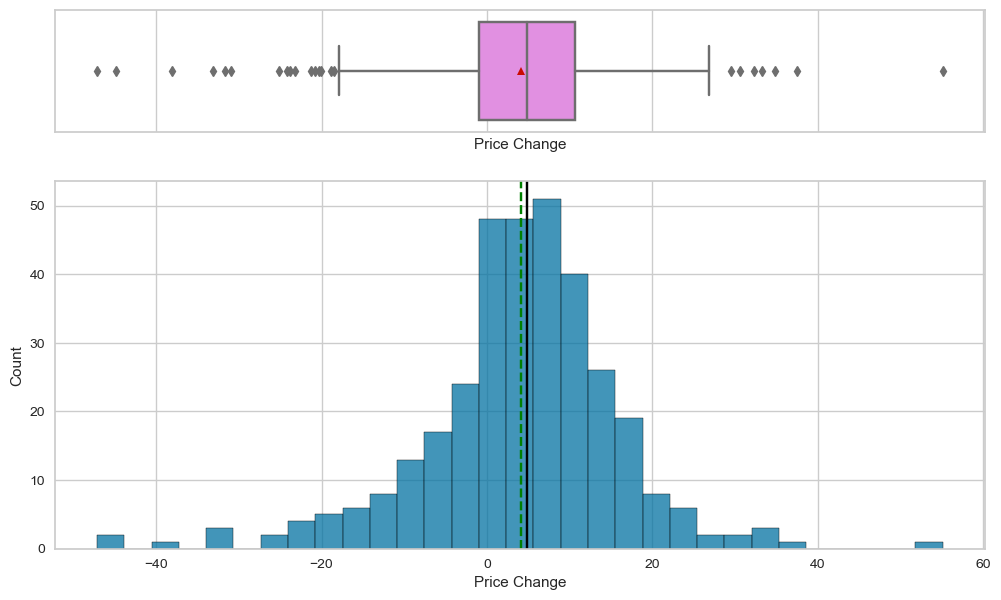

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "Price Change")

* The distribution of Price Change is approximately normal.

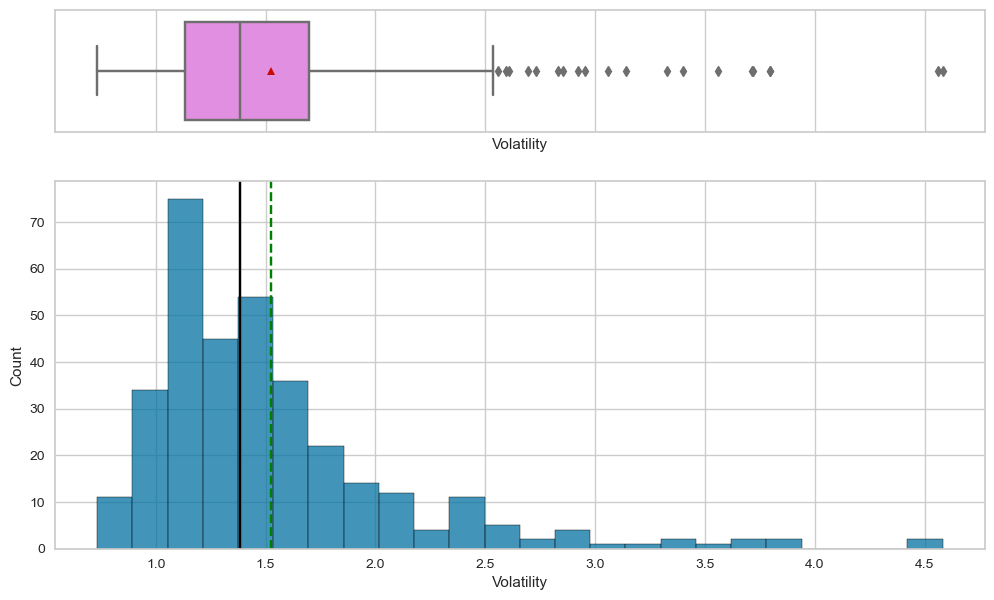

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "Volatility")

* Volatility is skewed right containing outliers, but mostly normal.

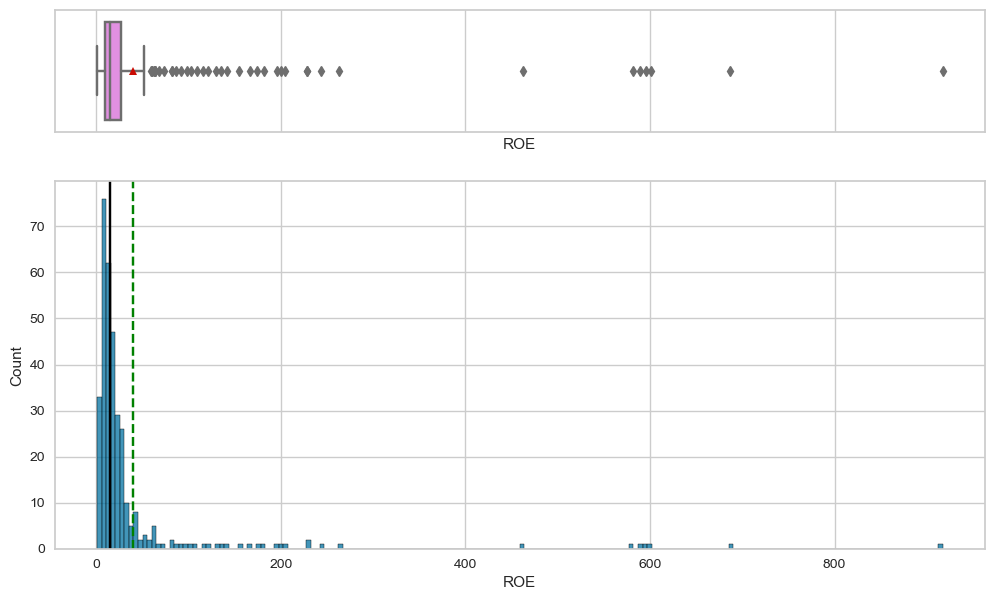

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "ROE")

* ROE is approximately normal with some outliers.

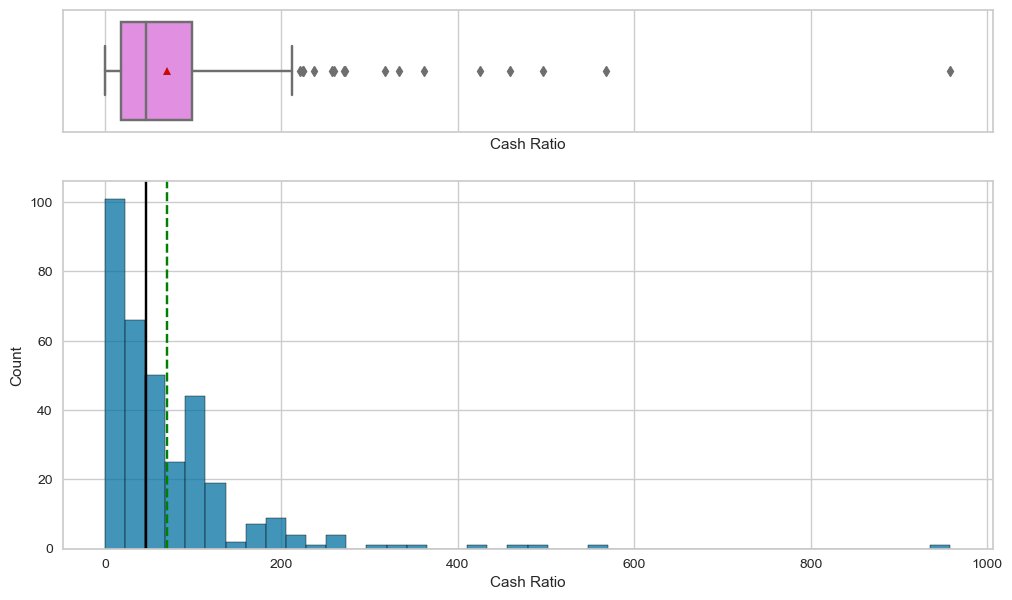

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "Cash Ratio")

* Very few companies have a Cash Ratio higher than 200.

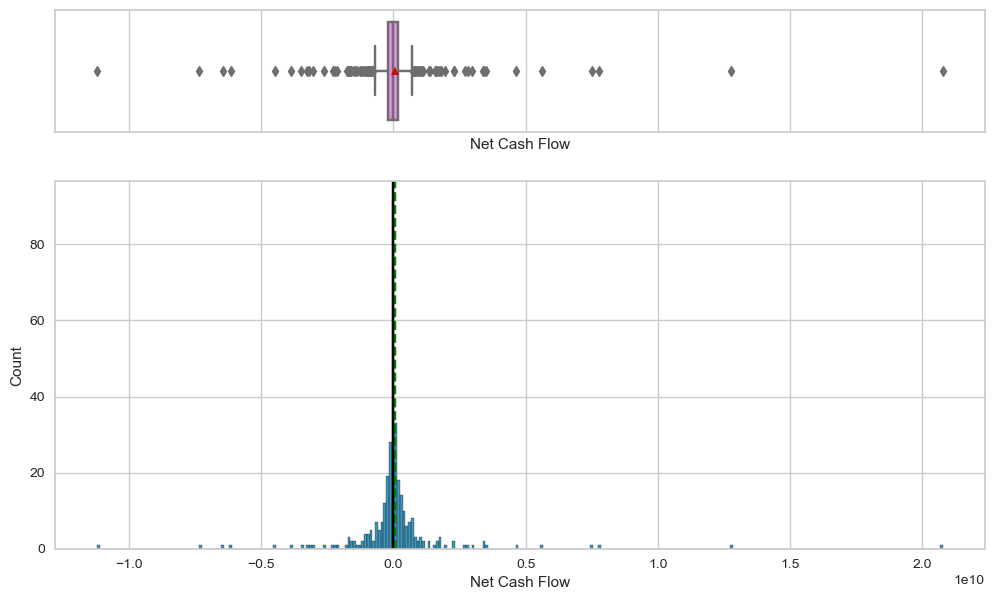

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Net Cash Flow")

* Net Cash Flow is approximately normal with some large outliers on both sides of the distribution.

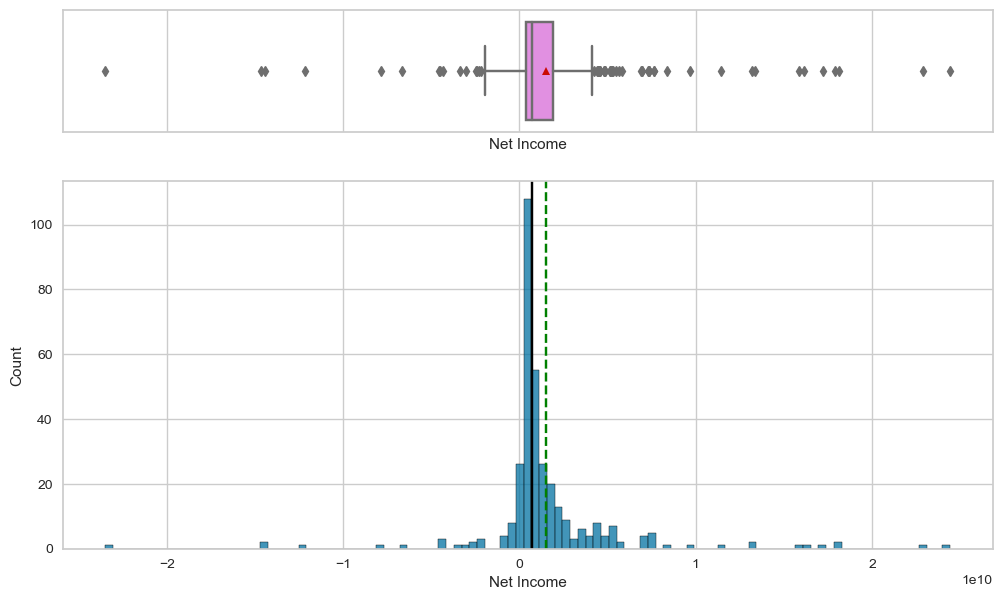

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Net Income")

* The distribution of Net Income is approximatley normal.

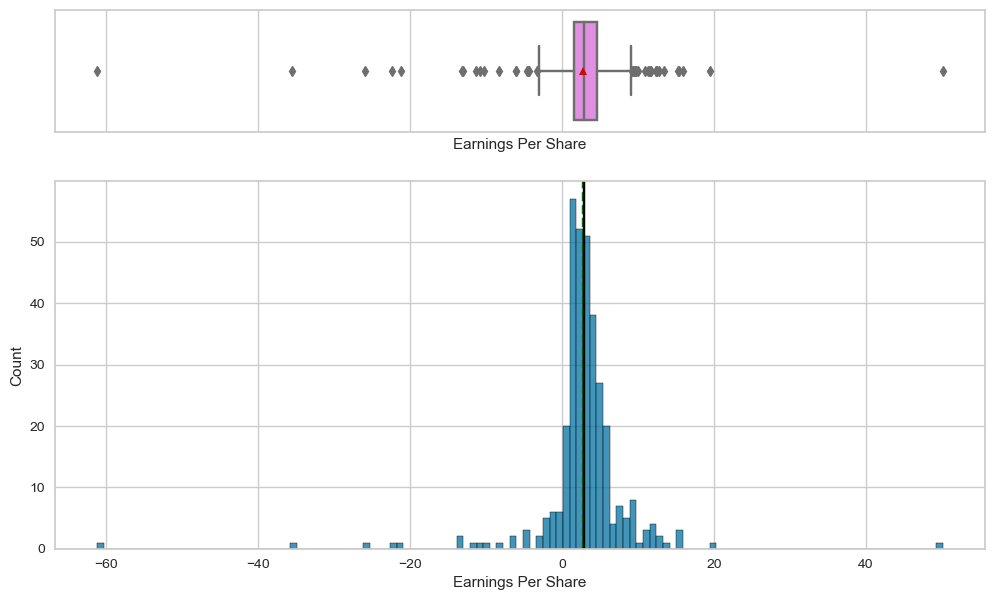

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Earnings Per Share")

* Earnings Per Share are mostly positive between 0 - $10.

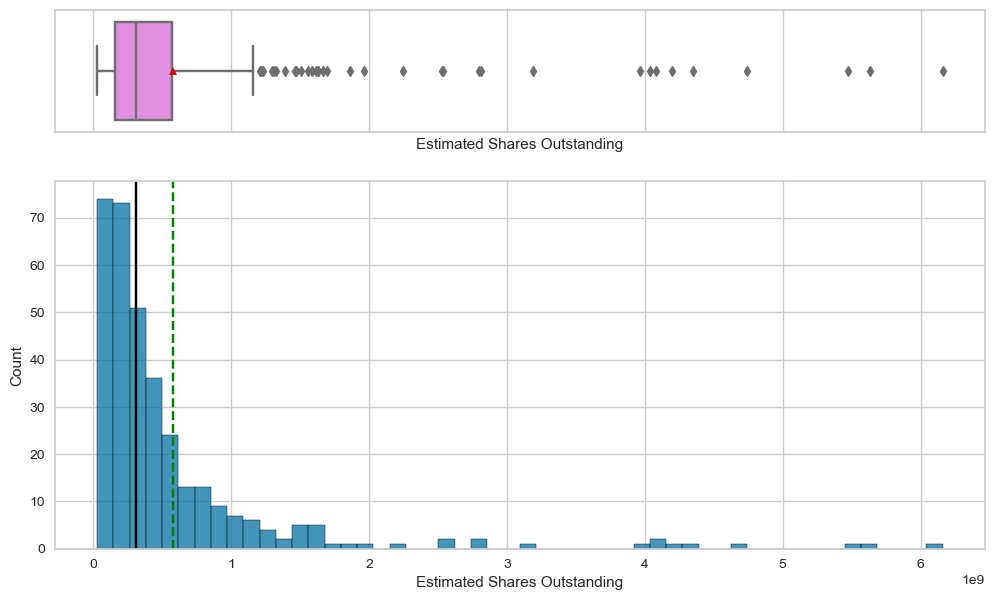

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Estimated Shares Outstanding")

* Most companies have less than 1B shares outstanding.

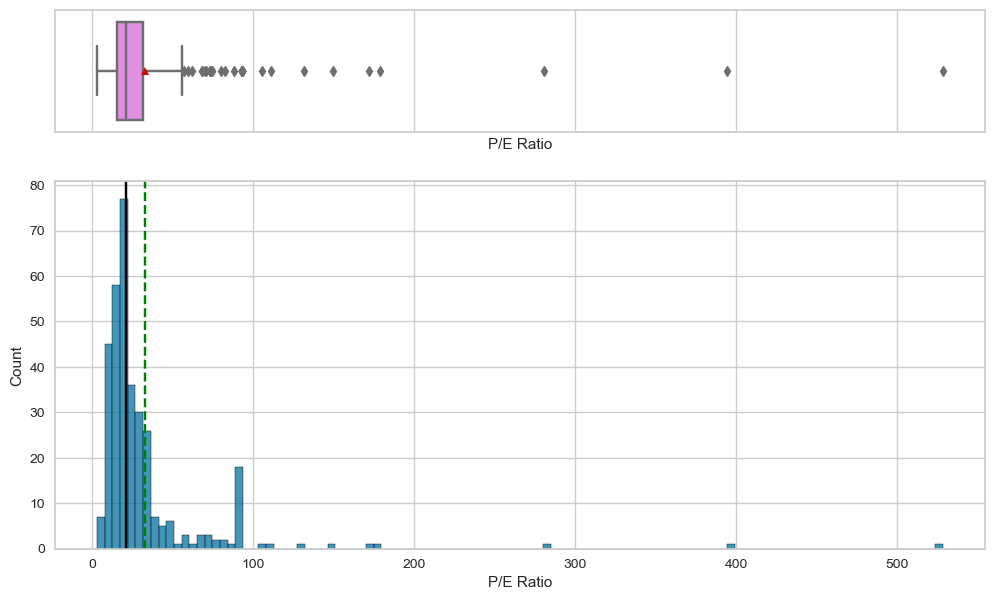

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "P/E Ratio")

* P/E Ratio is right skewed with most companies below 100.

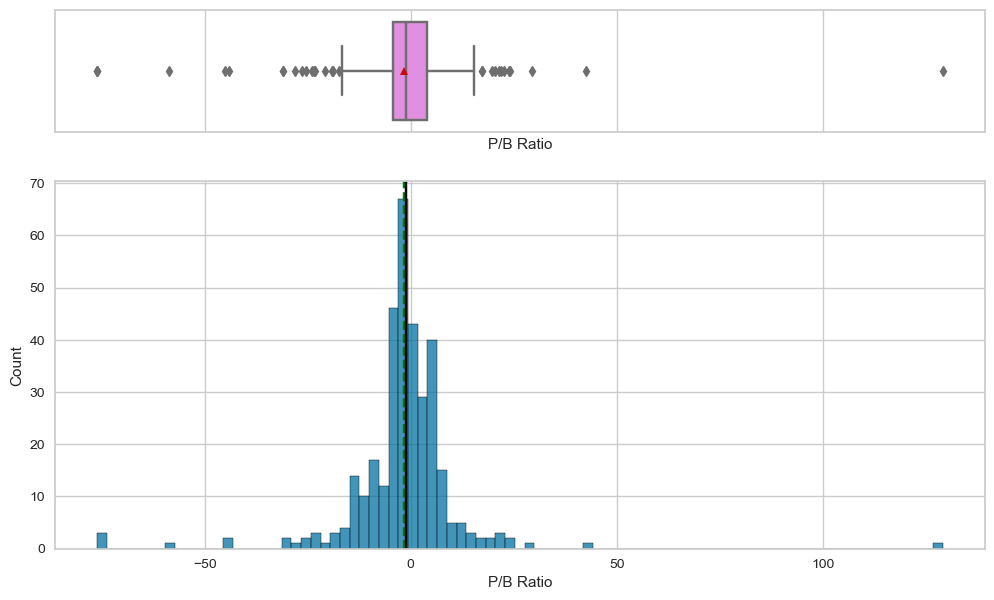

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "P/B Ratio")

* The distribution of P/B Ratio is mostly normal. 

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

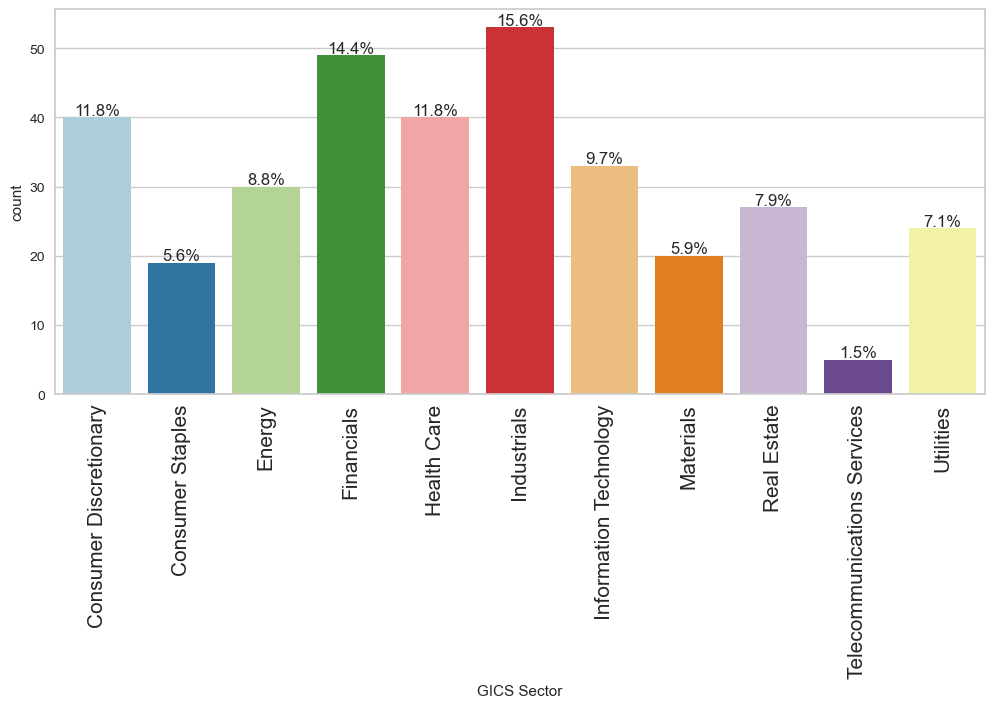

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "GICS Sector", perc=True)

* The top four sectors are Industrials, Financials, Consumer Discretionary, and Health Care.

#### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?


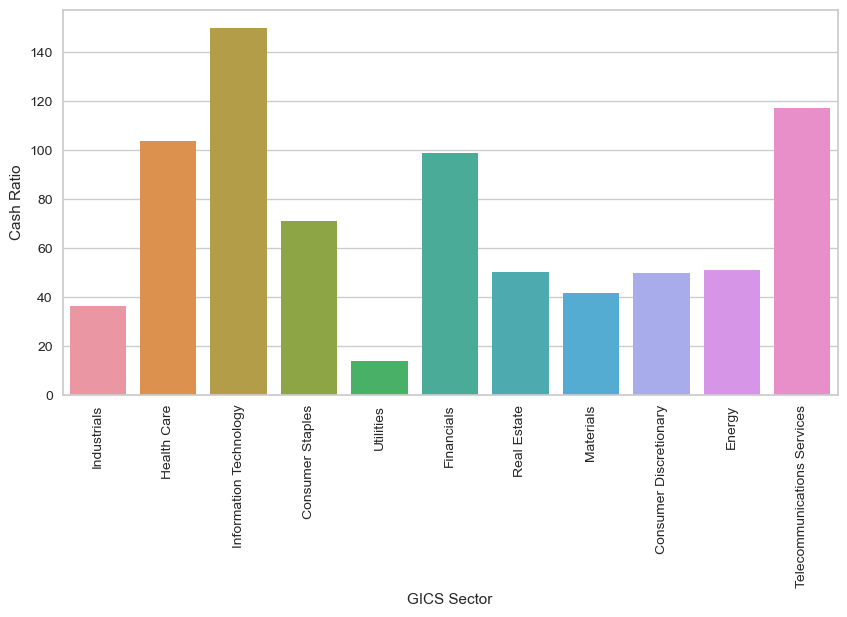

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

* Cash ratio ranges from 15 to as high as 150.
* On average it appears to be about 60 across economic sectors.

#### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

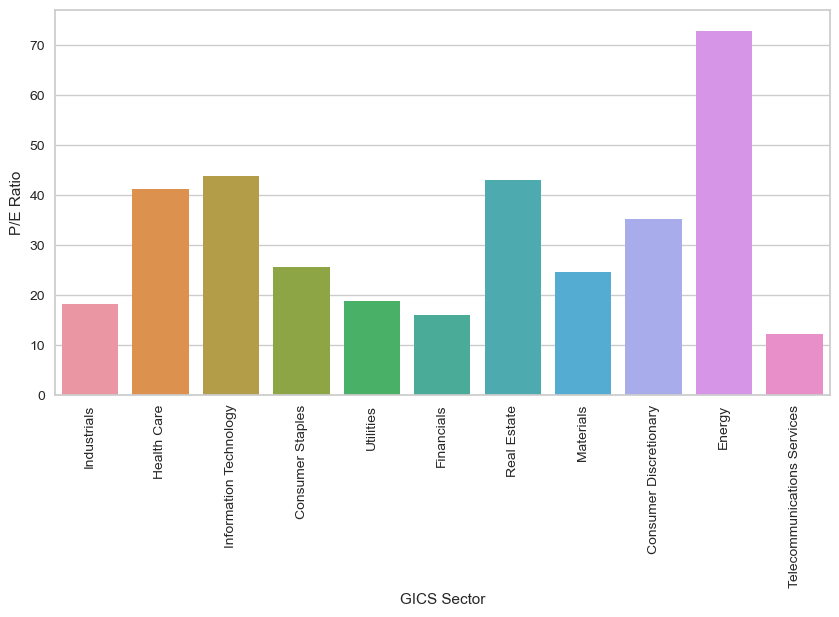

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

* P/E Ratios range from approximately 12 to as high as 75.
* On average, the P/E Ratios are about 20 across economic sectors.

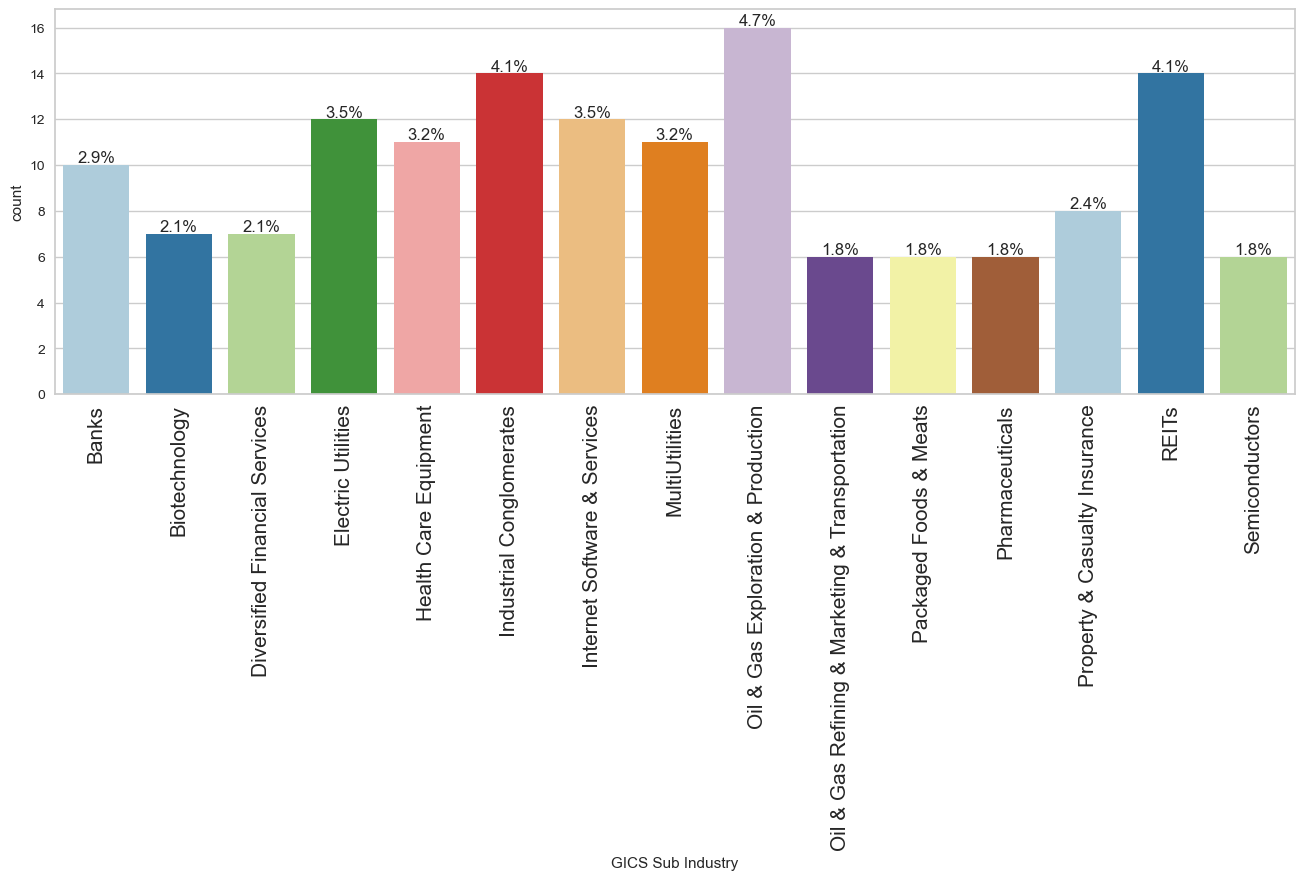

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "GICS Sub Industry", perc=True, n=15)

* The top four sub industries are Oil & Gas Exploration & Production, Industrial Conglomerates, Electric Utilities, and Internet Software & Services.

## Bivariate Analysis

### Let's check for correlations

In [26]:
num_col = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/E Ratio",
    "P/B Ratio",
]

<IPython.core.display.Javascript object>

#### 3. How are the different variables correlated with each other?


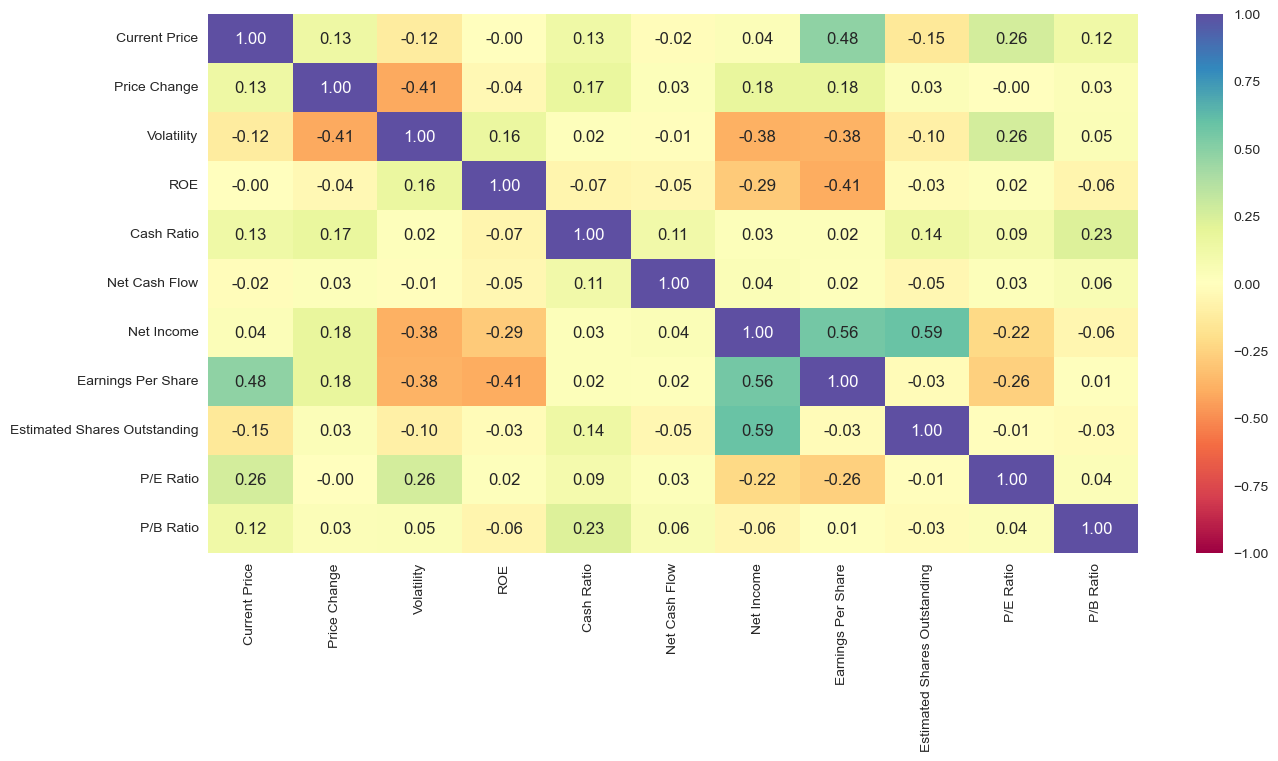

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

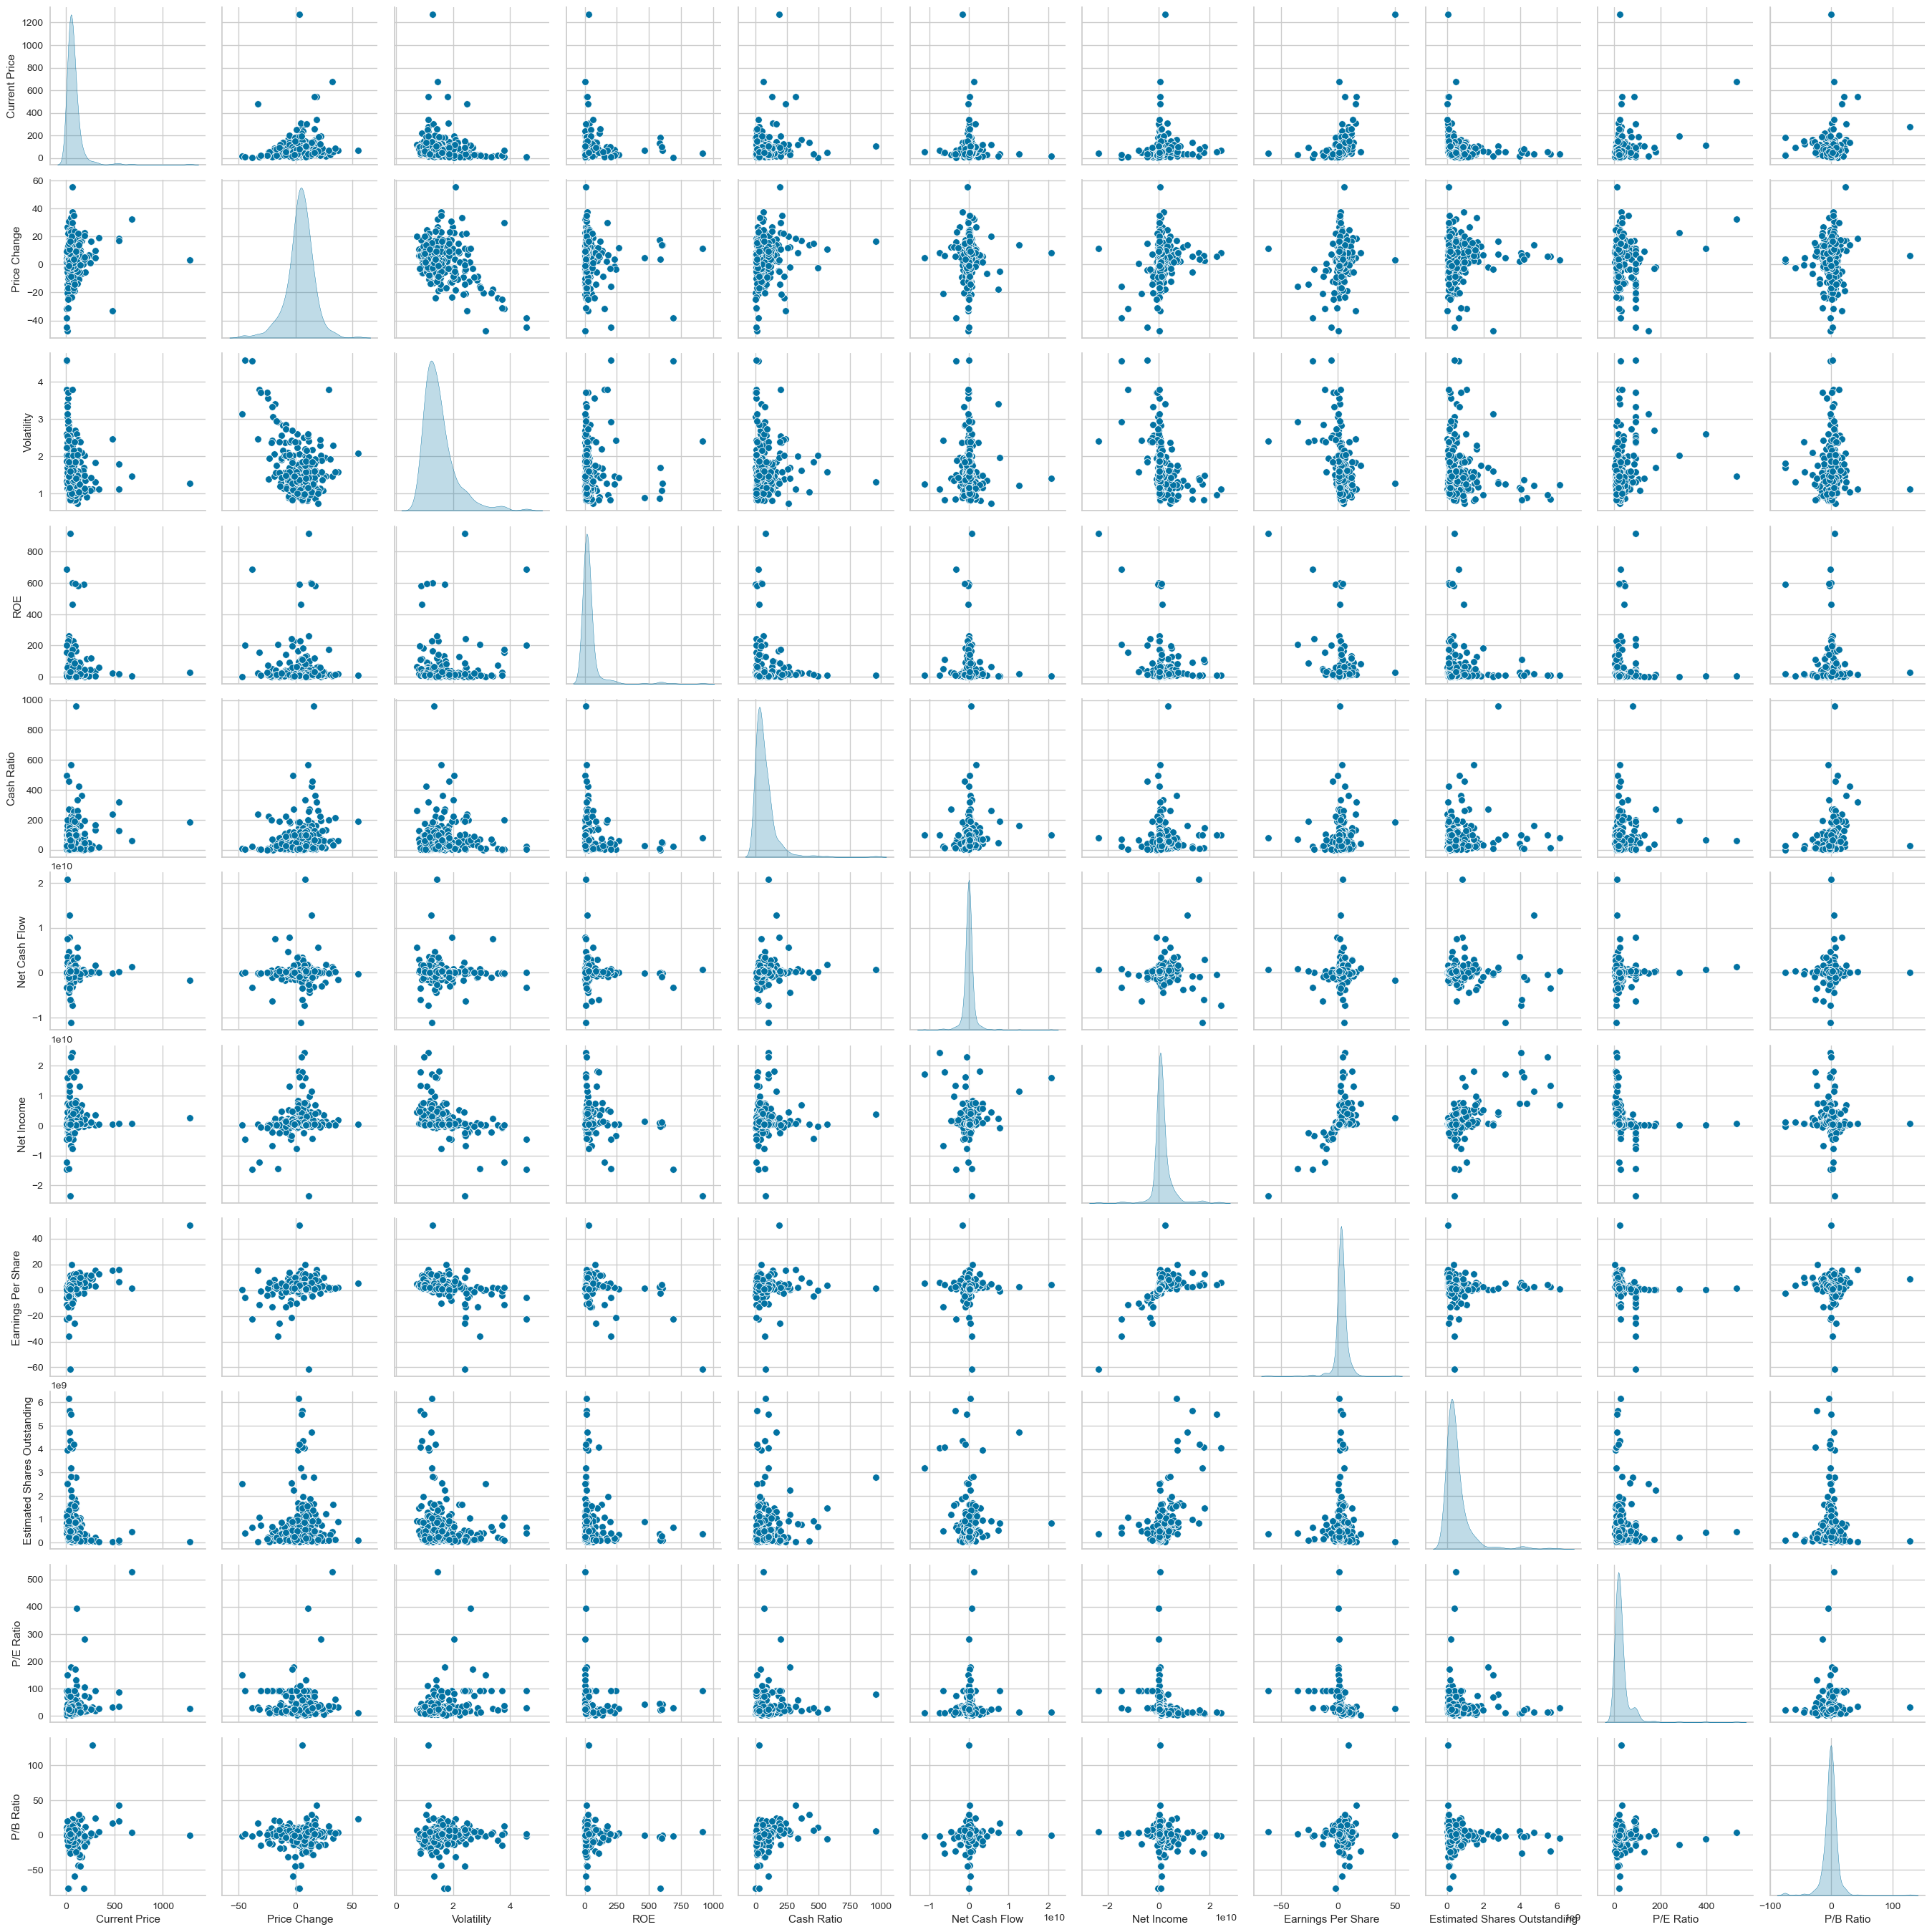

<IPython.core.display.Javascript object>

In [28]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

### Outliers

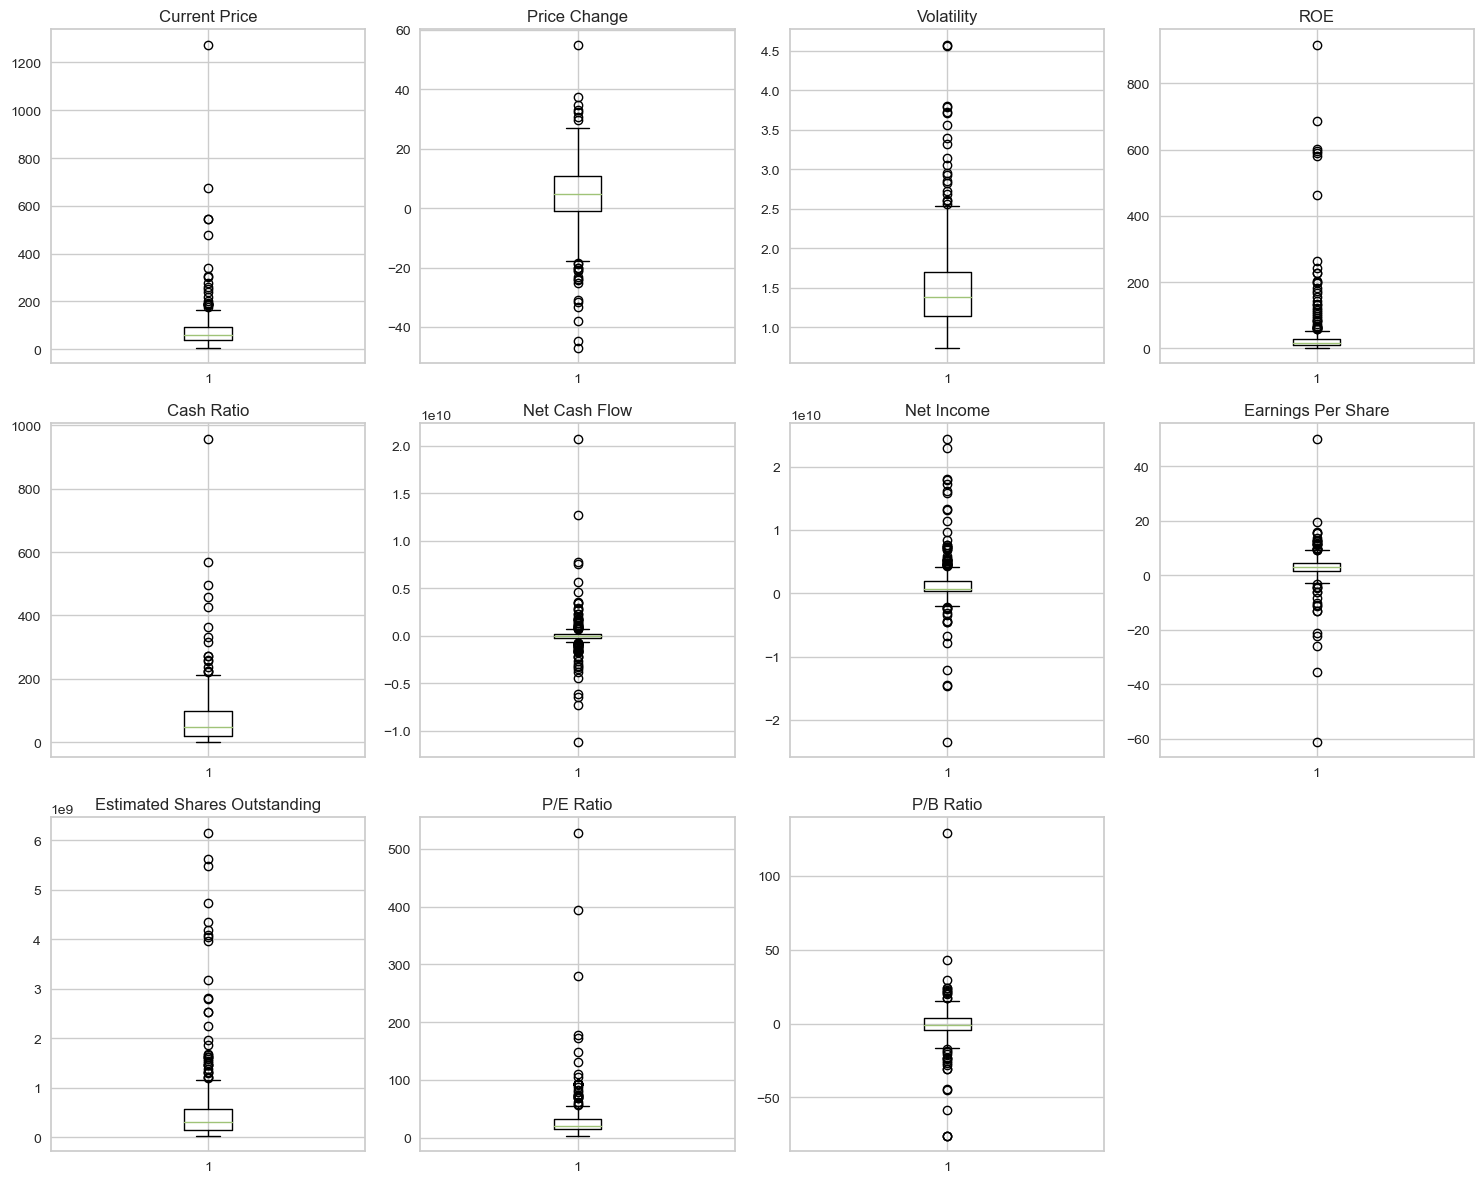

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers in each of the data sets.  They are proper values, so we will not treat them.

## K-means Clustering

In [30]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [31]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.1804670329624374
Number of Clusters: 5 	Average Distortion: 2.123228143152355
Number of Clusters: 6 	Average Distortion: 2.053350668955699
Number of Clusters: 7 	Average Distortion: 2.0312771801534404
Number of Clusters: 8 	Average Distortion: 1.9667200710989037
Number of Clusters: 9 	Average Distortion: 1.9609293600576212


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

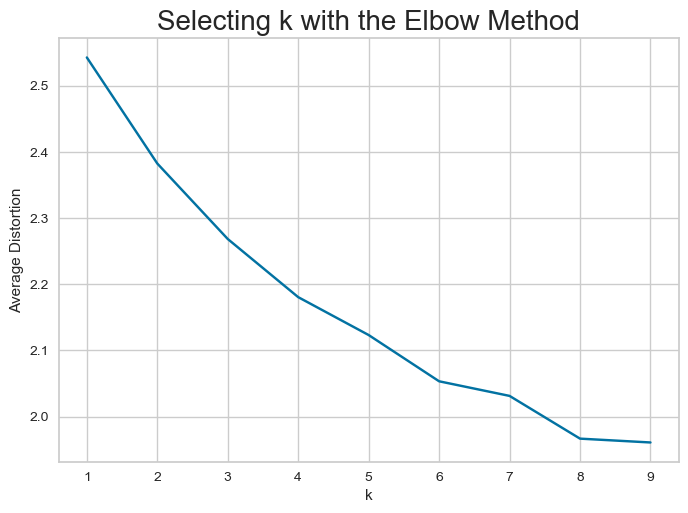

<IPython.core.display.Javascript object>

In [32]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* The appropriate value of k from the elbow curve appears to be 4 or 5.

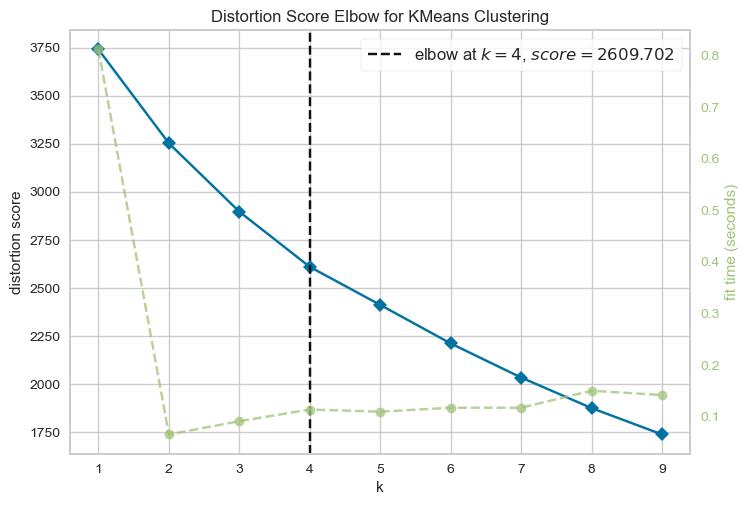

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [33]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4576529285895266
For n_clusters = 4, silhouette score is 0.4514969925542859
For n_clusters = 5, silhouette score is 0.4431884406997652
For n_clusters = 6, silhouette score is 0.43585057251228676
For n_clusters = 7, silhouette score is 0.39397699902210176
For n_clusters = 8, silhouette score is 0.42849009921450093
For n_clusters = 9, silhouette score is 0.38352786568064534


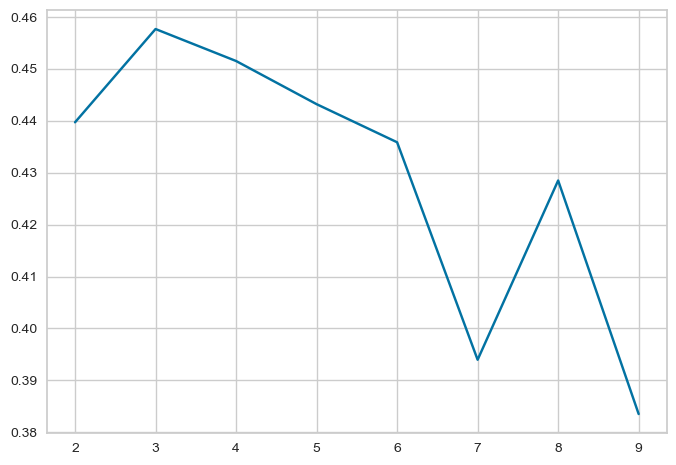

<IPython.core.display.Javascript object>

In [34]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* The silhouette score for 4 is higher than 5.  So, we will choose 4 as the value of k.

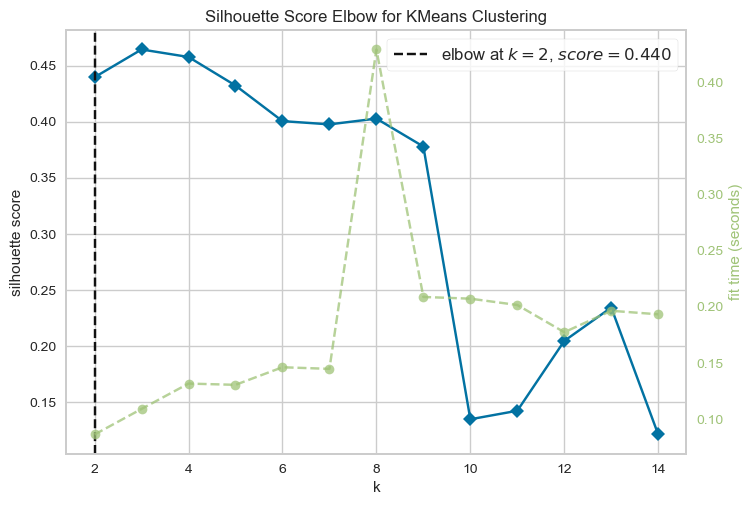

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [35]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

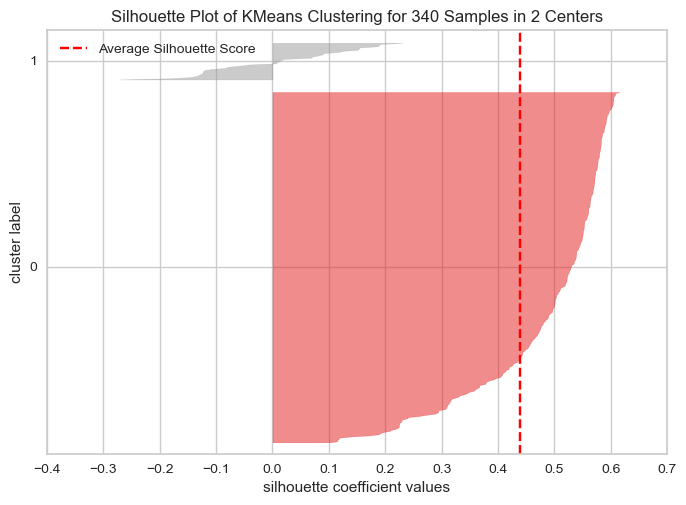

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

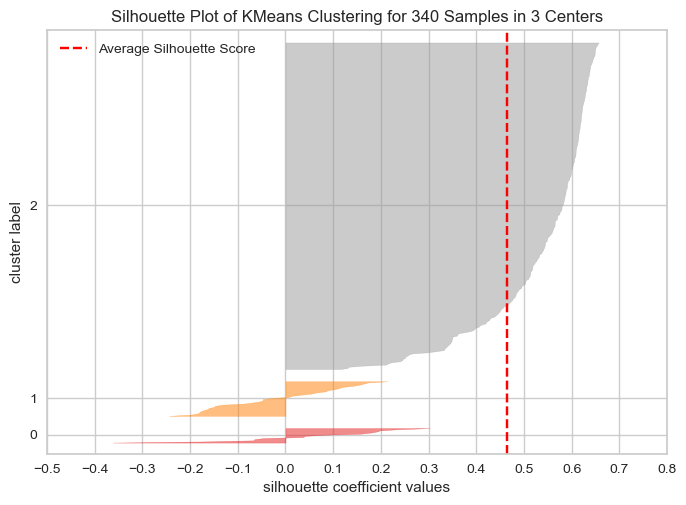

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

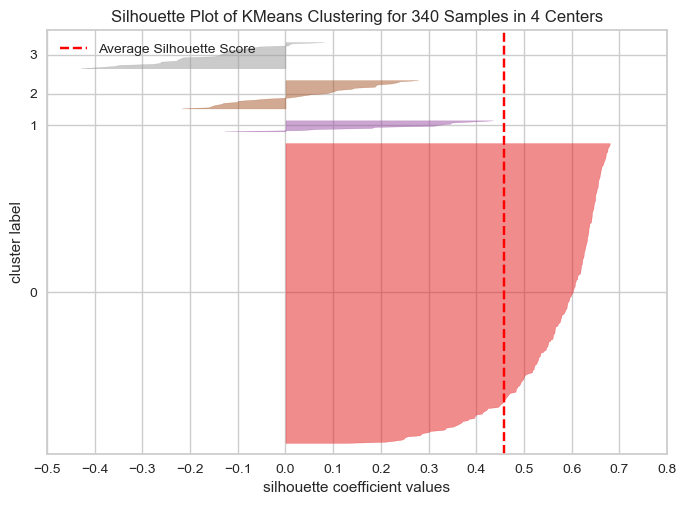

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

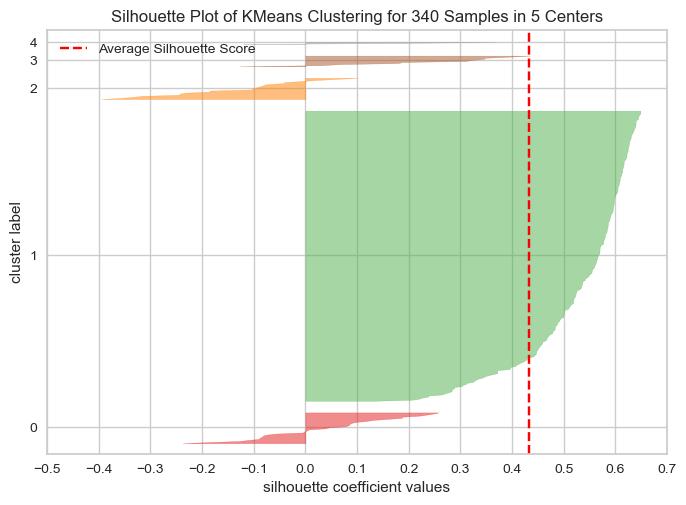

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

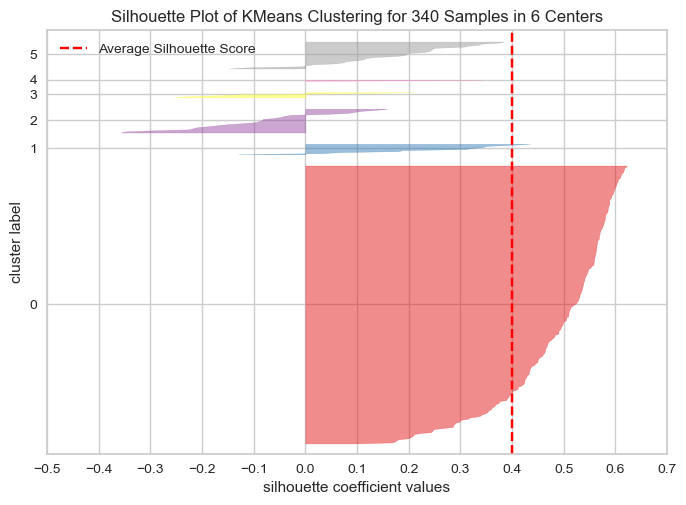

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Selecting final model

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.**

In [41]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [42]:
# adding kmeans cluster labels to the original dataframe and scaled dataframe
subset_scaled_df["K_means_segments"] = kmeans.labels_
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [43]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [44]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [45]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


<IPython.core.display.Javascript object>

In [46]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()


<IPython.core.display.Javascript object>

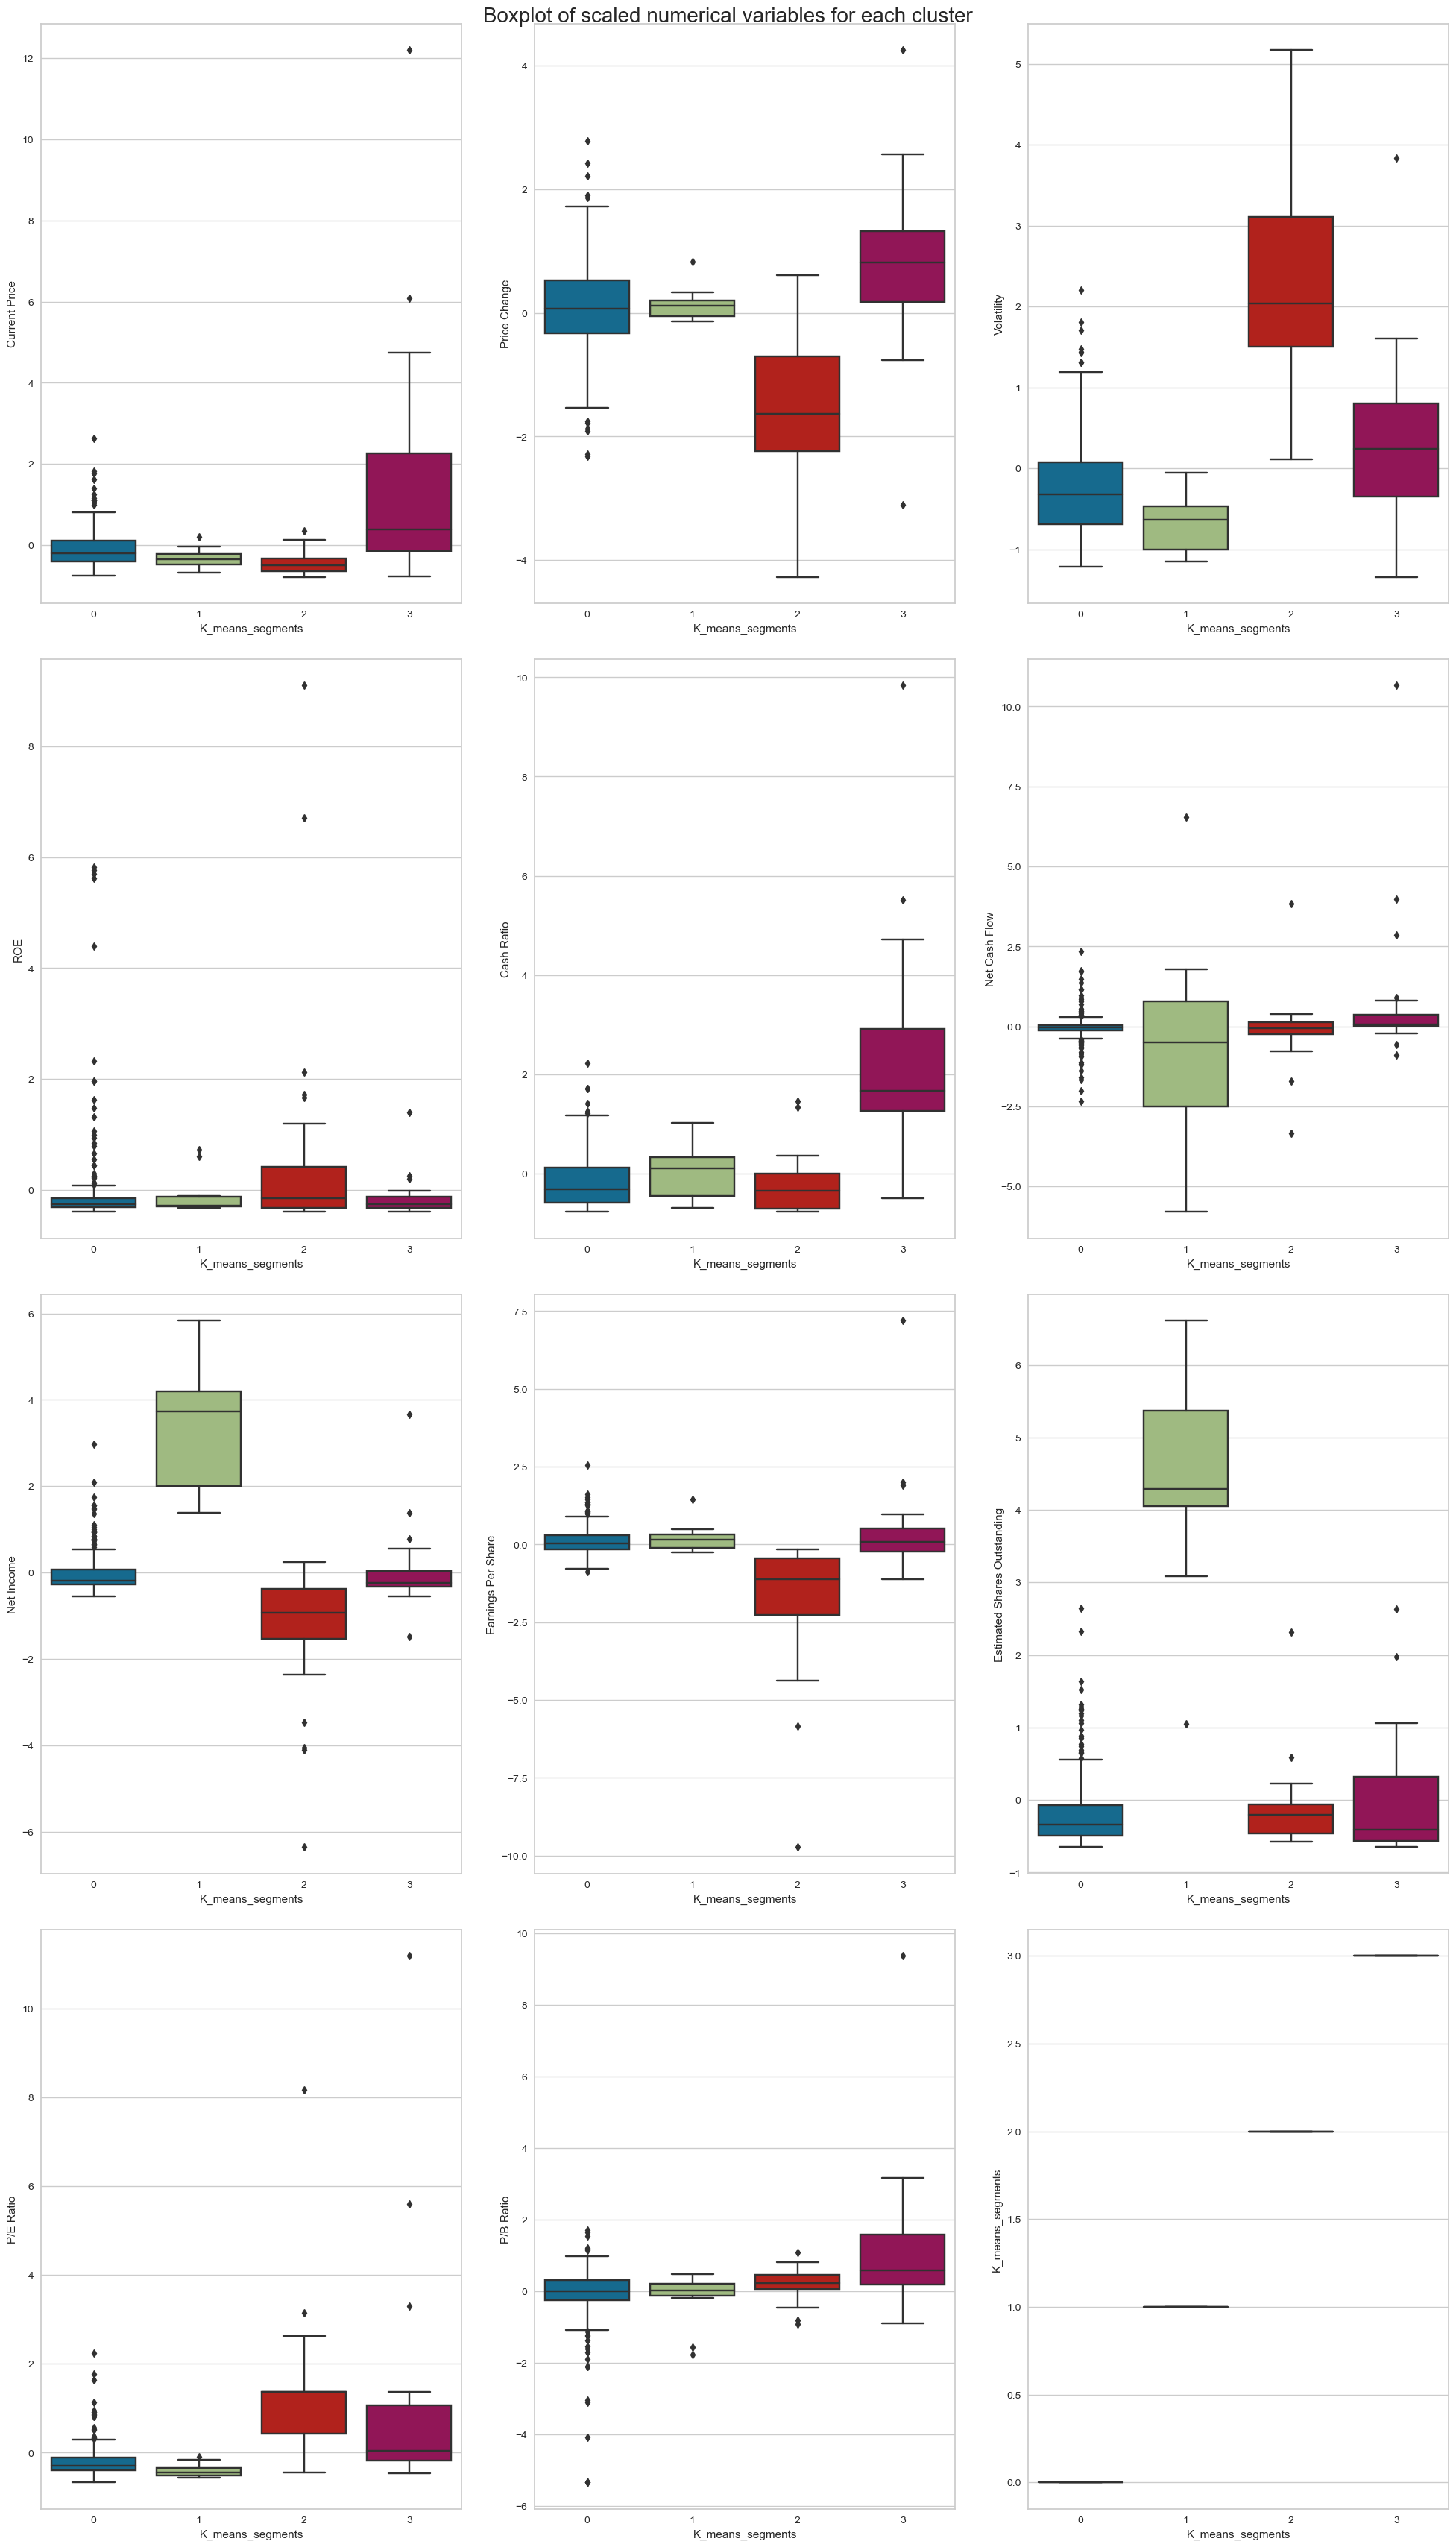

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - 277 companies in this cluster.
    - Price is slightly higher, but mostly in line with clusters 1 and 2.
    - Price changes range about 70 dollars.
    - Moderate volatility.
    - Some high outliers for ROE.
    - Cash Ratio similar to clusters 1 and 2.
    - Tight range of Net Cash Flow between -0.5 and 0.5

- **Cluster 1**:
    - 11 companies in this cluster.
    - Price is very simlar to cluster 2.
    - Price changes in a very small range between 5 to 15 dollars.
    - Low volatility.
    - Small range for ROE.
    - Cash Ratio similar to cluster 2.
    - Widest range of Net Cash Flow between approximately .4 and -1.2

- **Cluster 2**:
    - 27 companies in this cluster.
    - Price is very simlar to cluster 1.
    - Large price range between -50 and 10.
    - High volatility
    - Very large outliers for ROE.
    - Cash Ratio similar to cluster 1.
    - Net Cash Flow similar to clusters 0 and 3

- **Cluster 3**:
    - 25 companies in this cluster.
    - Largest price range.  
    - Price change between -5 to 30 dollars.
    - Moderate volatility.
    - Small range for ROE.  Similar to cluster 1.
    - Very wide range for Cash Ratio.
    - Net Cash Flow similar to clusters 0 and 2



## Hierarchical Clustering

### Checking Cophenetic Correlation

In [48]:
df2 = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [49]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832865.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798.
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.822502094153258.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543516.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633238.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402053.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078034.
Cophenetic corr

<IPython.core.display.Javascript object>

In [50]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865.
Cophenetic correlation for complete linkage is 0.8559480642212798.
Cophenetic correlation for average linkage is 0.946403836884538.
Cophenetic correlation for centroid linkage is 0.9494262703881242.
Cophenetic correlation for ward linkage is 0.7436374975239648.
Cophenetic correlation for weighted linkage is 0.7508819056084053.


<IPython.core.display.Javascript object>

In [52]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9494262703881242, which is obtained with centroid linkage.


<IPython.core.display.Javascript object>

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

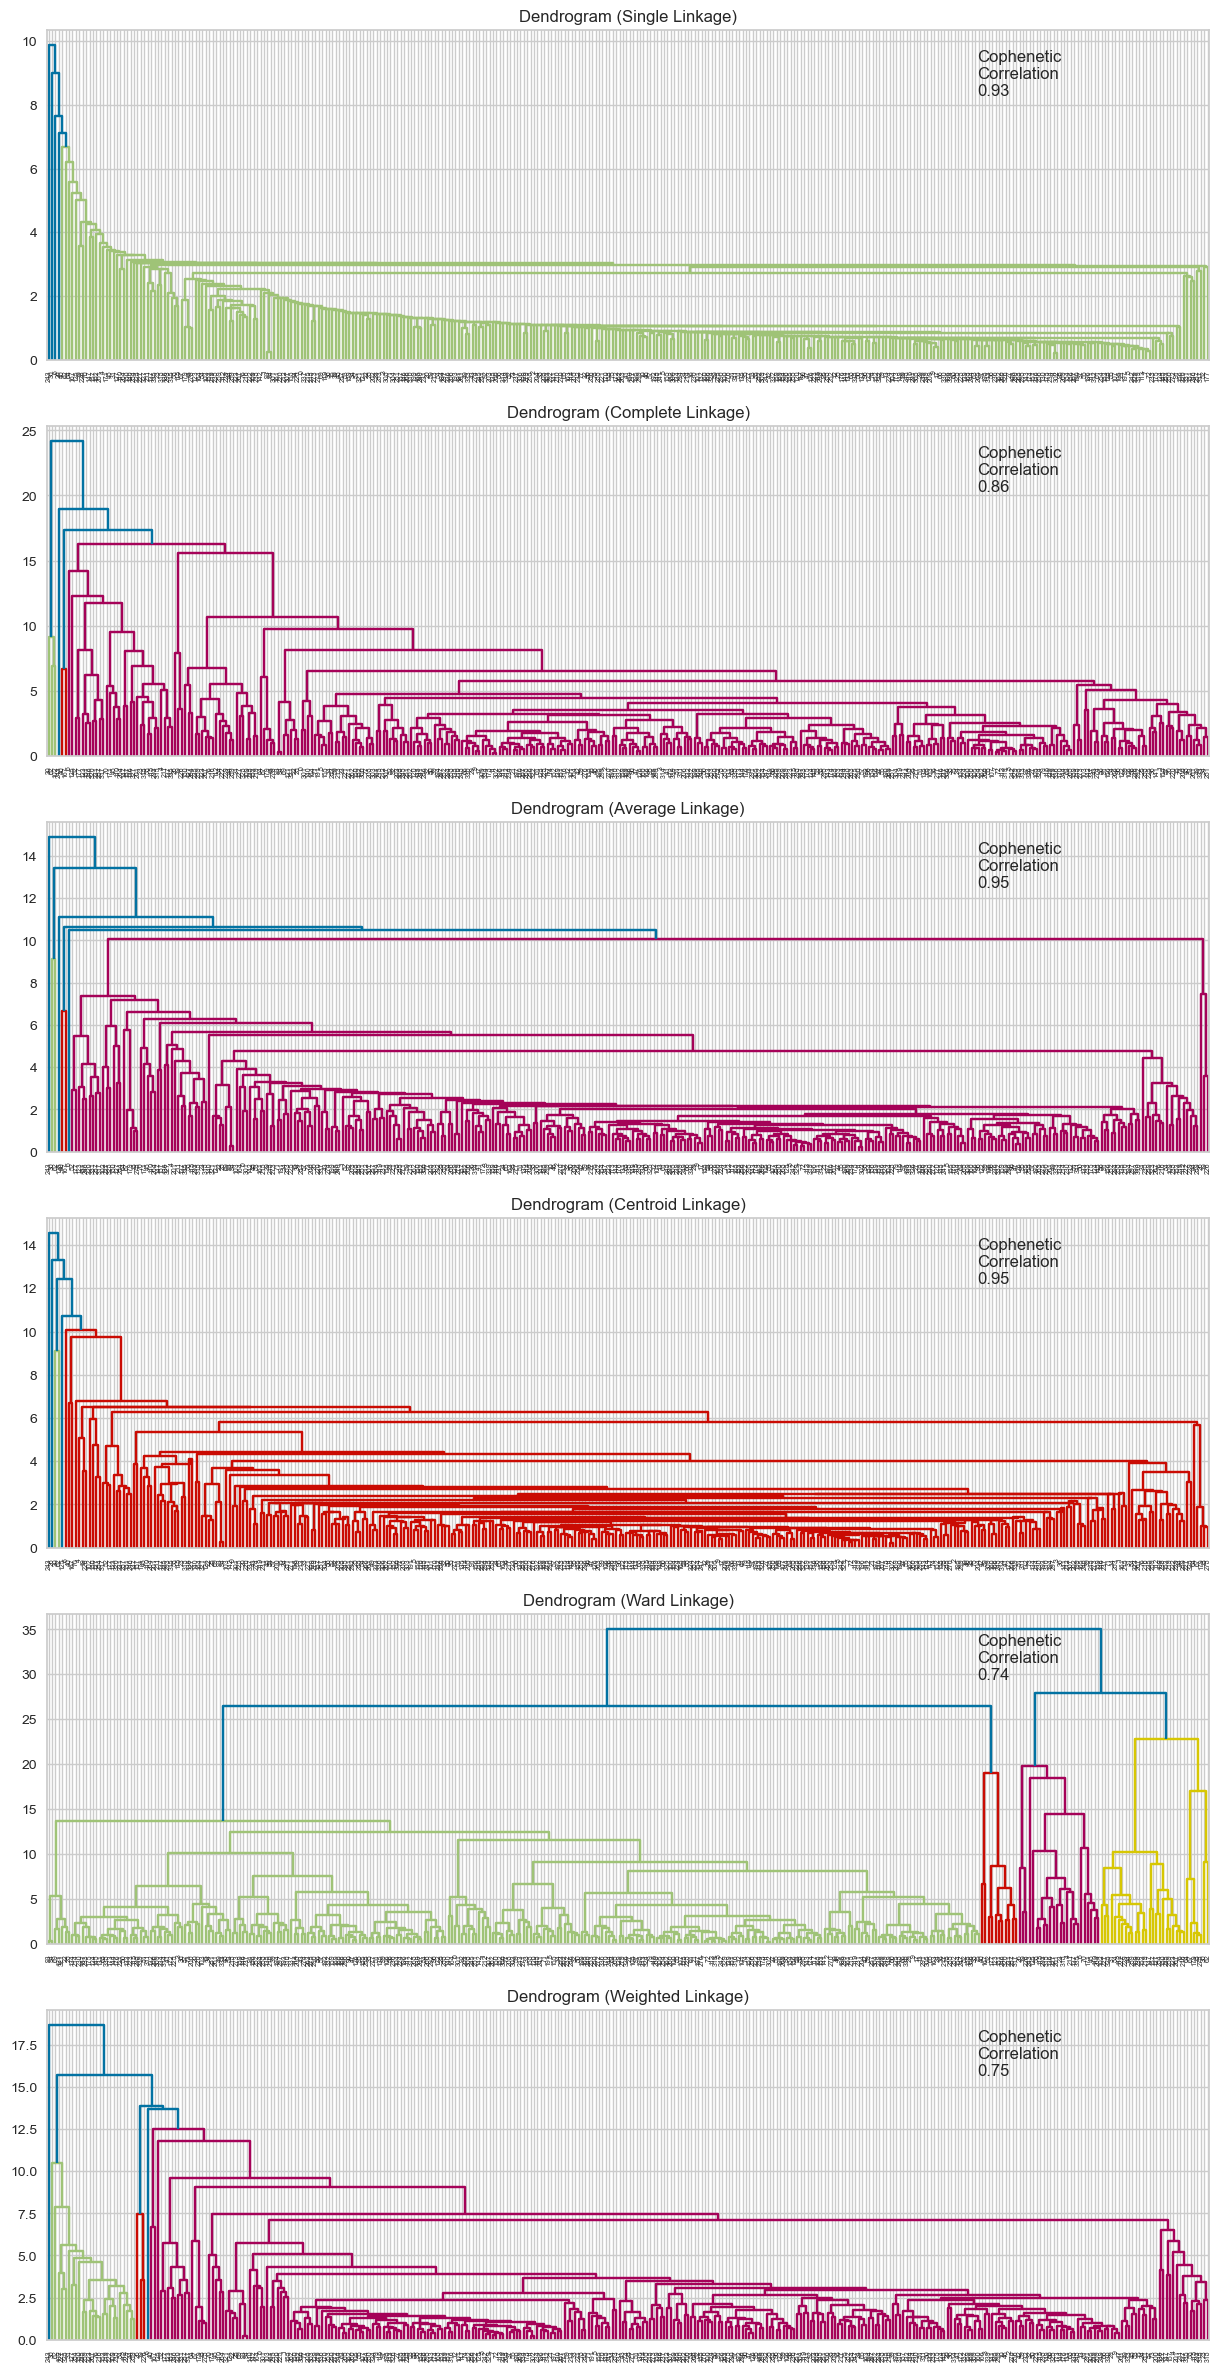

<IPython.core.display.Javascript object>

In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations

* Highest Cophenetic correlations (correlation and  number of clusters): Average (.94 and 13), Centroid (.93 and 11), Single (.92 and 9)

* Centroid or average linkage can be used as they both have similar splits and Cophenetic correlations.  The number of clusters to be checked will be at 3, 4, and 5.

* Average linkage will be used since it has the highest Cophenetic correlation score.

### Creating Model using sklearn

In [54]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(df2)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [55]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [56]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [57]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [58]:
cluster_profile.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,6.710469e+07,1.607391e+09,2.90564,5.723178e+08,32.325679,-1.762402,0.386905,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429,3.000000,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141,2.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467,3.000000,1


<IPython.core.display.Javascript object>

In [59]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

<IPython.core.display.Javascript object>

## Creating Final Model

#### We will use Ward linkage to see if we can make the clusters more distinct from each other.

In [60]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [61]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [62]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [63]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [64]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 273 countries in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'C

<IPython.core.display.Javascript object>

In [65]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,43497156.250000,-3197471875.000000,-7.785312,473289495.126250,72.496532,-0.780467,1.718750,32
1,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,1.181818,11
2,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,2.958333,24
3,71.846974,4.953643,1.392784,25.117216,53.831502,1197787.545788,1557673743.589744,3.691044,443918320.070366,23.583804,-3.087957,0.003663,273


<IPython.core.display.Javascript object>

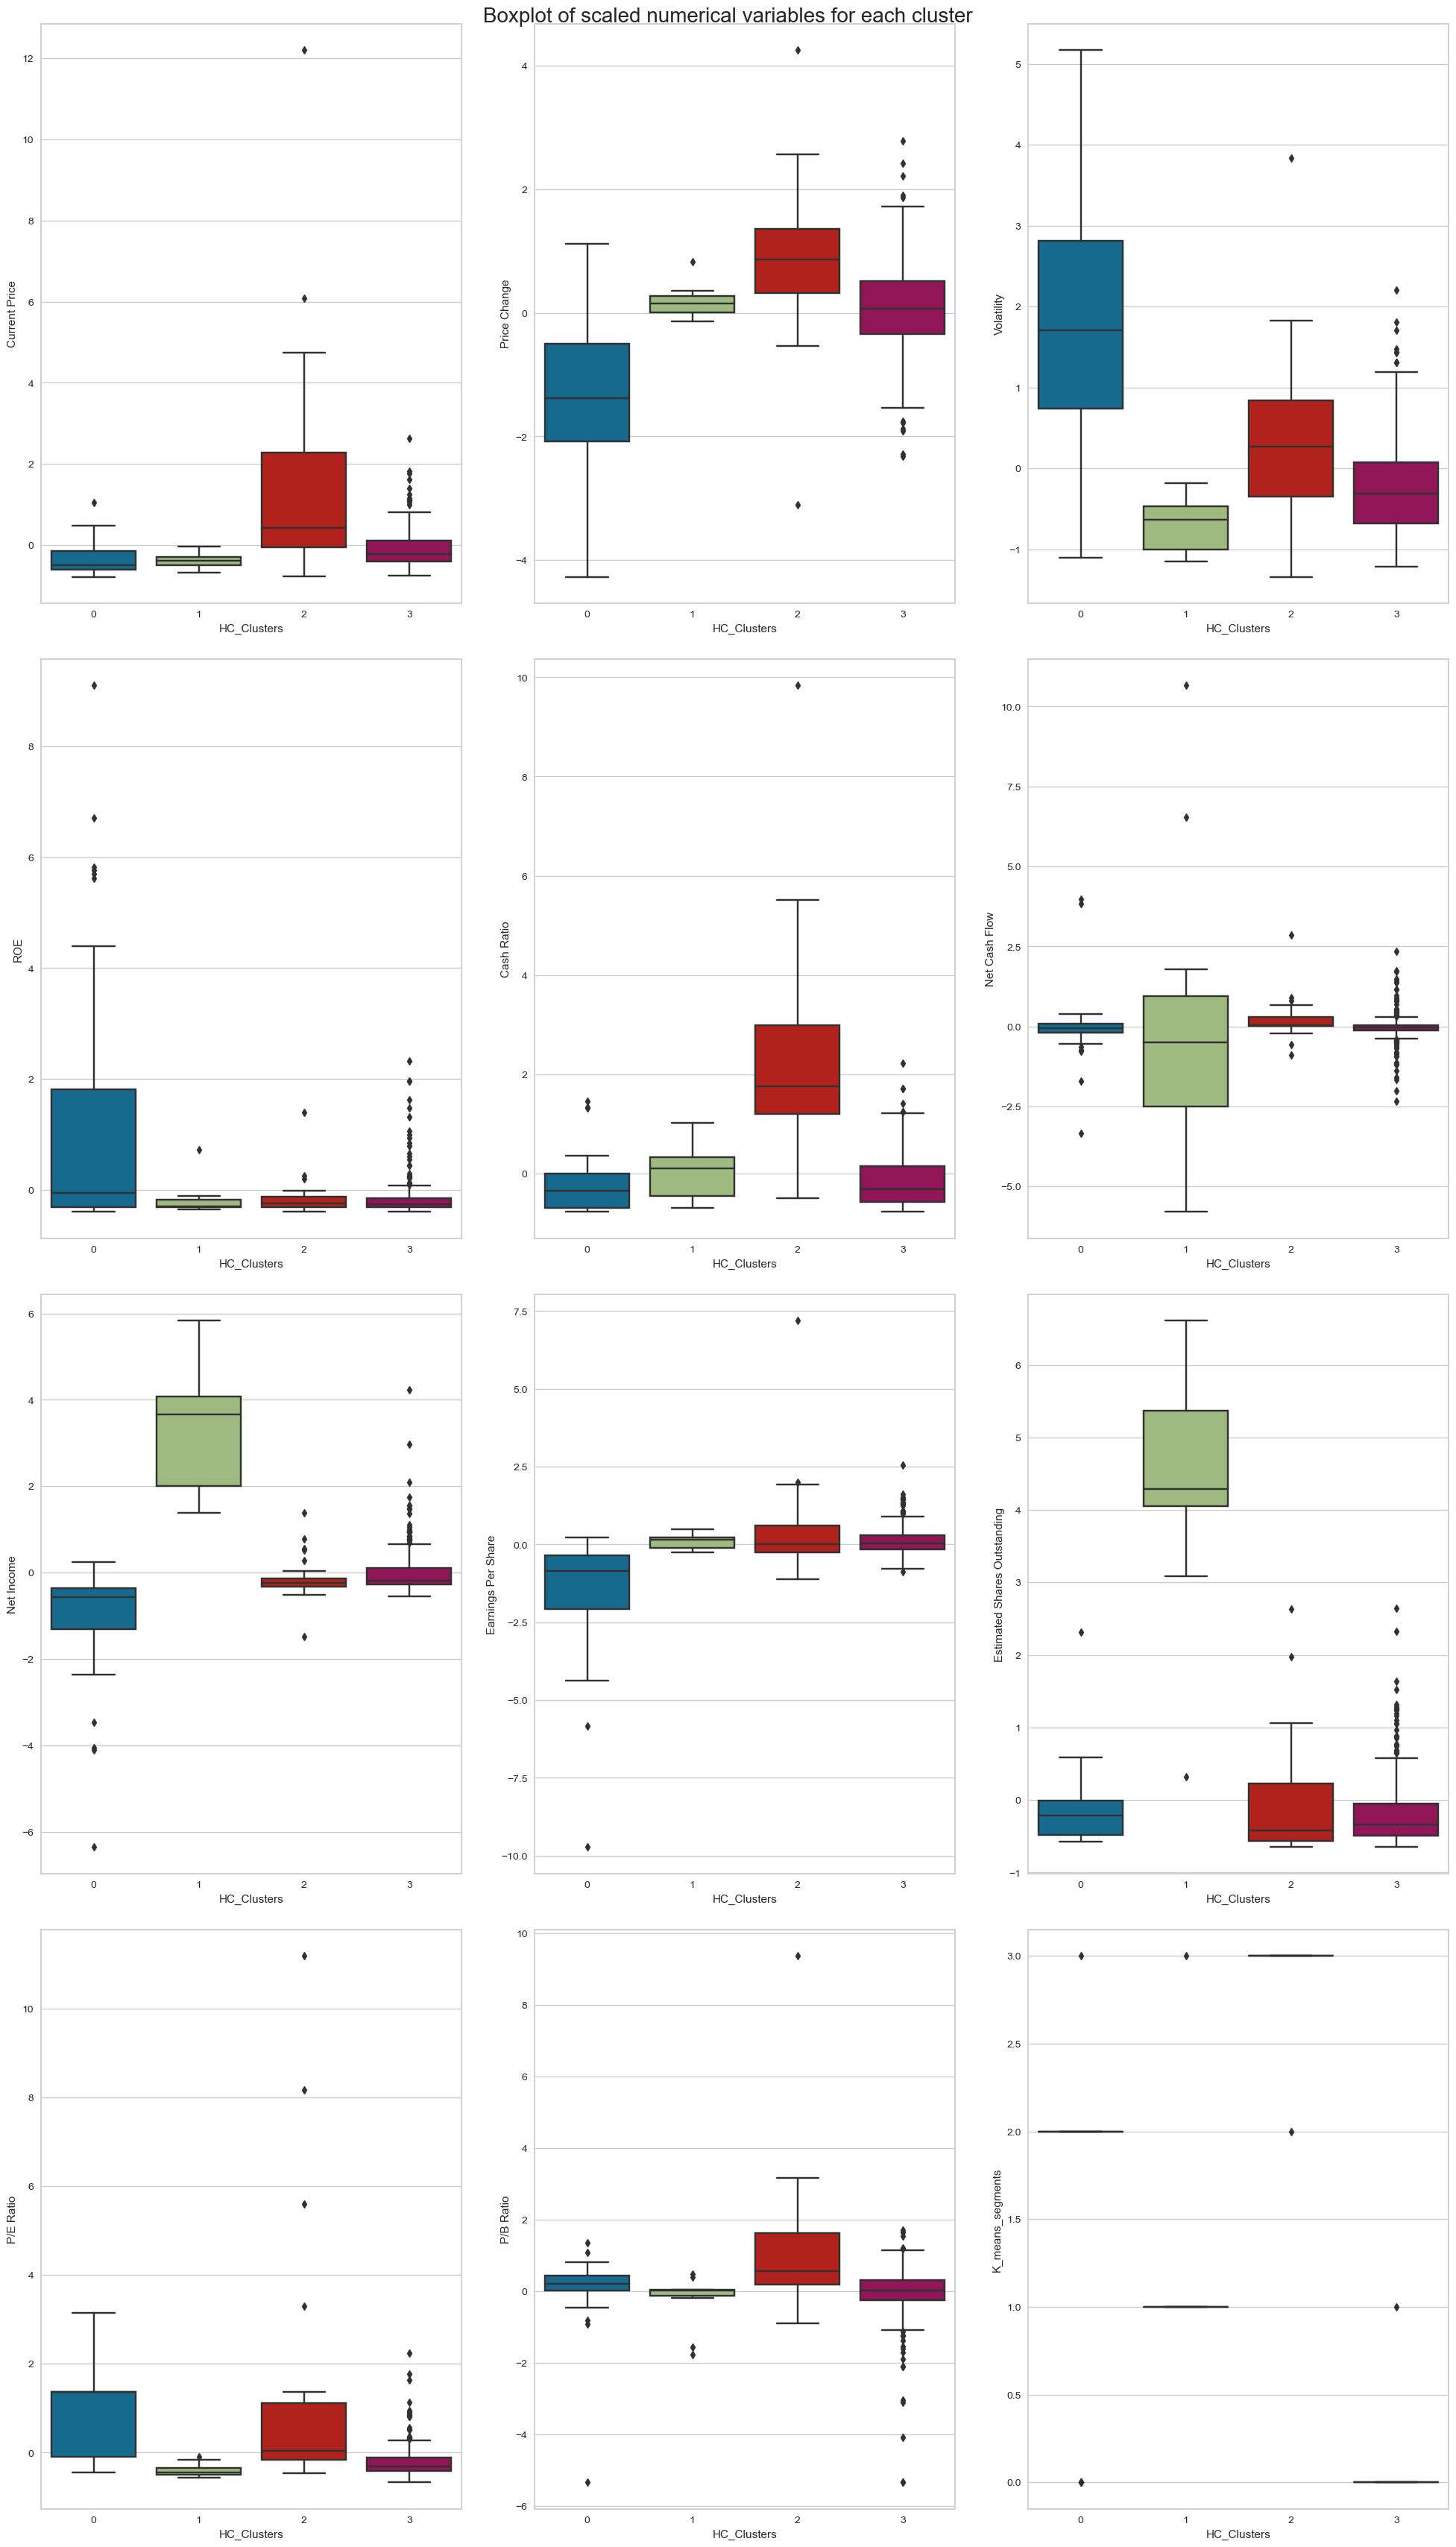

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - 32 companies in this cluster.
    - High volatility and ROE.
    
- **Cluster 1**:
    - 11 companies in this cluster.
    - Highest Net Cash Flow, Net Income and Estimated Shares Outstanding.

- **Cluster 2**:
    - 24 companies in this cluster.
    - Highest current price, price change, Cash Ratio, Earnings Per Share, P/E Ratio and P/B Ratio.

- **Cluster 3**:
    - 273 companies in this cluster.
    - Moderate values compared to other clusters across variables. 


## K-means vs Hierarchical Clustering

* Processing time was approximately equal.
* The clustering techniques both yielded similar results.  Use of the Ward linkage gave slightly more distinct clusters.
* The observations in each cluster remained relatively the same between the two techniques.  
* Four clusters was the appropriate number of clusters from both algorithms.


## Actionable Insights and Recommendations

Cluster 0:
- These are high volatility companies characterized by low/negative cash and earnings per share.

Cluster 1:
- Low volatility companies with a fair amount of cash.  Many of these companies would be consider value stocks.

Cluster 2: 
- Companies that may be in transition from earlier growth stages.  Some very high P/E, but low ROE indicating many of these company's stocks are overvalued in the marketplace.

Cluster 3:
- Low ROE and cash flows.  Low P/E's indicating possible early buying opportunties for companies on the rebound.

This model provides four clusters each with their own attributes based on the stocks within the clusters.  Selecting some stocks from each of the clusters could provide diversification for a client's portfolio.  However, stock selection still needs to be done by thoroughly researching and valuing recommendations on a company-by-company basis.  Randomly selecting stocks by taking a few from each cluster will not necessarily benefit the client or meet the Trade&Ahead's financial due diligence on behalf of their client.  The clusters should be considered as a guideline for a client's overall portfolio as Trade&Ahead's investment research team uncovers potential stock investment opportunties.